In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

### Lectura, selección de columnas y conversión de datos

In [21]:
df = pd.read_csv('netflix_titles.csv')

##Cantidad de valores nulos

df.isna().sum().sort_values(ascending=False) ##La columna director tiene 2634 datos faltantes. Seguido de country y cast con 831 y 825 faltantes respectivamente.
df.isna().sum().sort_values(ascending=False)/df.shape[0]*100 ##Esto es equivalente a que el 29.9% de los datos de director son nulos.

##Remplazar los valores nulos con la moda
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

##Información básica del dataframe antes de la conversión
# df.info()   ##Todas las columnas tienen datos de tipo objeto (string) excepto el año de salida de la serie/película.

# ##Convertir el año de adición de la película/serie a DateTime
df['date_added'] = df['date_added'].str.strip() ##Primero se debe solucionar que algunos valores tienen espacios vaciós en medio
df['date_added'] = pd.to_datetime(df['date_added'],format = '%B %d, %Y')

# ##Verificar filas repetidas
df.duplicated().sum() #No hay filas repetidas

# ## Optimizar los datos de la columna release year
df = df.astype({'release_year':np.int32})

# ##Eliminar columnas innecesarias
df.drop(columns=['description','show_id'],inplace=True)



### Identificar valores atípicos/Outliers

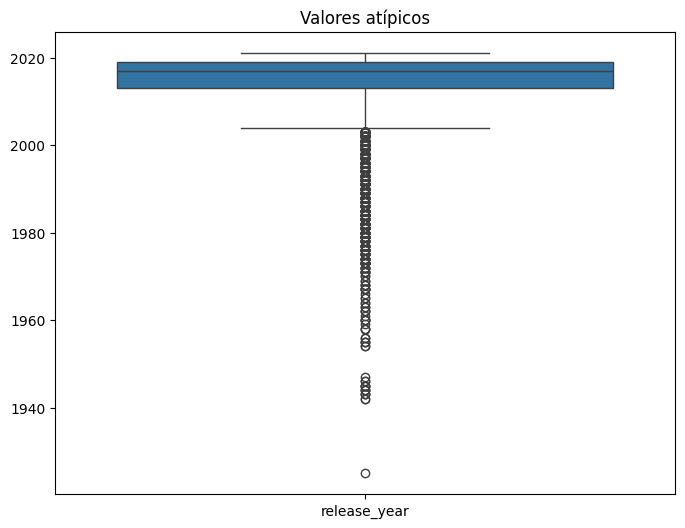

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data=df,ax=ax)
ax.set_title('Valores atípicos')
plt.show()

##La columna de año de estreno tiene muchos valores por fuera del rango intercuartílico. Vamos a trabajar solo con valores dentro de un rango 1.5 veces el rango intercuartílico.

q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)

iqr = q3-q1
limite_inferior = q1 - 1.5*iqr
limite_superior = q3 + 1.5*iqr

df = df.loc[(df['release_year']>=limite_inferior)&(df['release_year']<=limite_superior)]


### Análisis exploratorio - Distribución de los datos

### Insights

In [13]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


In [11]:
###El siguiente paso es verificar qué valores tienen las columnas de tipo objeto

cat = df.select_dtypes('O')

for i, col in enumerate(cat):
    # sns.countplot(data=cat, y=col)
    print(cat[col].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Na

In [4]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64